# **StockTrend SVM: Predicting Stock Price Direction with a Support Vector Machine**
This notebook demonstrates a classical machine learning approach to forecasting whether a stock’s closing price will rise or fall the next day. It employs a Support Vector Machine (SVM) classifier trained on technical indicators derived from Yahoo Finance data. The project illustrates how traditional machine learning techniques can be effectively applied to financial prediction tasks.

## Step 1: Import Required Libraries
Import necessary Python libraries for data handling, modelling, and visualisation.

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
np.random.seed(42)

## Step 2: Load Stock Data
Retrieve historical stock data using the `yfinance` API and calculate rolling statistics for technical indicators.

In [2]:
def load_stock_data(ticker='AAPL', start='2020-01-01', end='2024-01-01'):
    data = yf.download(ticker, start=start, end=end)
    data = data[['Close']]

    data['MA10'] = data['Close'].rolling(10).mean()
    data['MA50'] = data['Close'].rolling(50).mean()
    data['Return'] = data['Close'].pct_change()
    data['Volatility'] = data['Return'].rolling(10).std()
    data['Target'] = (data['Return'].shift(-1) > 0).astype(int)

    return data.dropna()

ticker = 'AAPL'
data = load_stock_data(ticker)
data.tail()

[*********************100%***********************]  1 of 1 completed


Price,Close,MA10,MA50,Return,Volatility,Target
Ticker,AAPL,,,,,
Date,,,,,,
2023-12-22,192.192551,194.323940,183.959355,-0.005547,0.009145,0
2023-12-26,191.646561,194.311037,184.245963,-0.002841,0.008196,1
2023-12-27,191.745819,194.156171,184.537133,0.000518,0.007718,1
2023-12-28,192.172684,193.721356,184.867972,0.002226,0.004933,0
2023-12-29,191.130325,193.167410,185.203939,-0.005424,0.004905,0


## Step 3: Feature Preparation
Extract engineered features, apply standard scaling, and split dataset into train and test sets.

In [3]:
def prepare_features(data, features):
    X = data[features]
    y = data['Target']
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    return train_test_split(X_scaled, y, test_size=0.2, shuffle=False)

features = ['MA10', 'MA50', 'Volatility']
X_train, X_test, y_train, y_test = prepare_features(data, features)

## Step 4: Train the SVM Model
Train a Support Vector Classifier (SVC) using the radial basis function kernel.

In [4]:
def train_svm_classifier(X_train, y_train):
    model = SVC(kernel='rbf', C=1.0, gamma='auto')
    model.fit(X_train, y_train)
    return model

svm_model = train_svm_classifier(X_train, y_train)

## Step 5: Evaluate Model Performance
Evaluate the model using standard metrics and a confusion matrix to assess accuracy.

Classification Report:
              precision    recall  f1-score   support

           0       0.47      1.00      0.64        88
           1       1.00      0.04      0.07       104

    accuracy                           0.48       192
   macro avg       0.73      0.52      0.36       192
weighted avg       0.76      0.48      0.33       192

Accuracy: 0.4792


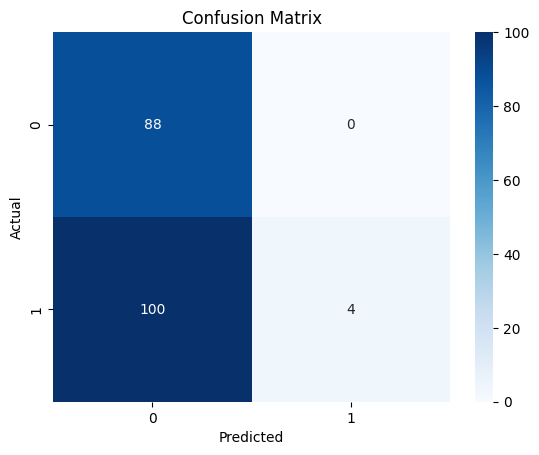

In [5]:
y_pred = svm_model.predict(X_test)

print('Classification Report:')
print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Step 6: Visualise Predictions
Visualise the actual versus predicted price direction over time.

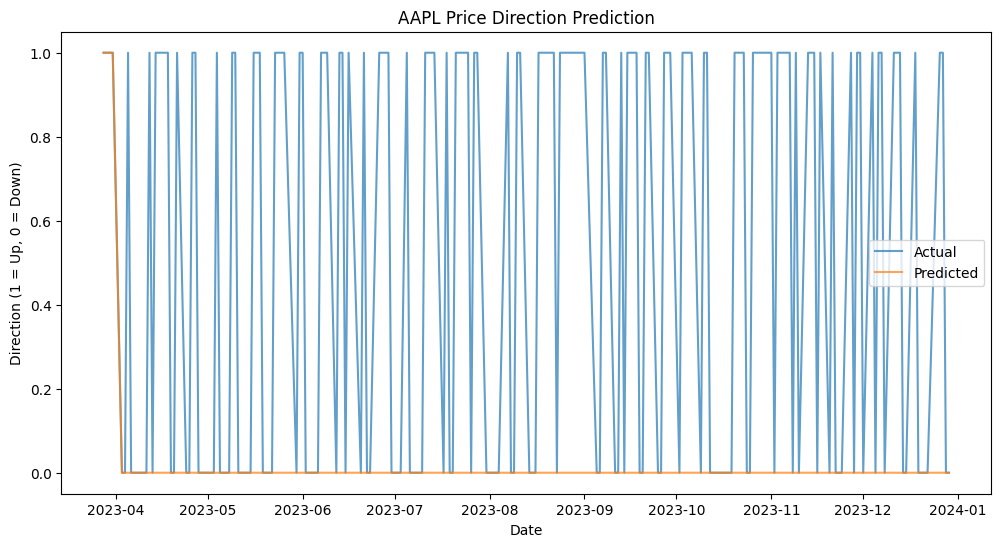

In [6]:
plt.figure(figsize=(12, 6))
plt.plot(data.index[-len(y_test):], y_test.values, label='Actual', alpha=0.7)
plt.plot(data.index[-len(y_test):], y_pred, label='Predicted', alpha=0.7)
plt.title(f'{ticker} Price Direction Prediction')
plt.xlabel('Date')
plt.ylabel('Direction (1 = Up, 0 = Down)')
plt.legend()
plt.show()

## Potential Next Steps
- Experiment with other ML algorithms (e.g. Logistic Regression, Random Forest)
- Add more technical indicators like RSI, MACD
- Perform backtesting using actual trading strategies
- Extend the pipeline to use multiple tickers